In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_AL_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1,0.0,0.0,0.0,2,2,...,0.0,0,0.0,0,0.0,0.0,0.0,0,2.0,0
1,1,1,2,0,0,NaN,3.0,NaN,3,0,...,NaN,0,NaN,0,NaN,NaN,NaN,2,0.0,7
2,2,2,1,0,0,0.0,NaN,NaN,2,0,...,0.0,0,NaN,2,NaN,NaN,3.0,2,NaN,7
3,2,2,2,1,0,0.0,2.0,0.0,2,2,...,0.0,0,0.0,2,0.0,2.0,2.0,2,0.0,7
4,2,2,1,0,0,NaN,2.0,NaN,2,0,...,NaN,0,NaN,3,NaN,NaN,NaN,2,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1,NaN,0.0,NaN,0,0,...,NaN,0,NaN,3,NaN,NaN,NaN,3,0.0,70
354,2,3,2,0,0,NaN,0.0,NaN,3,2,...,0.0,0,NaN,0,NaN,0.0,NaN,1,NaN,70
355,2,2,2,1,0,0.0,0.0,0.0,0,0,...,0.0,0,0.0,2,0.0,0.0,0.0,2,0.0,70
356,2,1,0,3,0,NaN,0.0,NaN,0,0,...,NaN,0,NaN,0,NaN,NaN,NaN,1,0.0,70


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
int64		column 3	0
int64		column 4	0
int64		column 5	0
float64		column 6	55
float64		column 7	18
float64		column 8	73
int64		column 9	0
int64		column 10	0
int64		column 11	0
float64		column 12	73
int64		column 13	0
int64		column 14	0
int64		column 15	0
int64		column 16	0
int64		column 17	0
int64		column 18	0
int64		column 19	0
int64		column 20	0
int64		column 21	0
float64		column 22	55
int64		column 23	0
int64		column 24	0
float64		column 25	18
int64		column 26	0
float64		column 27	73
int64		column 28	0
float64		column 29	73
float64		column 30	36
float64		column 31	55
int64		column 32	0
float64		column 33	55
int64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,358.000000,358.000000,358.000000,358.000000,358.000000,303.000000,340.000000,285.000000,358.000000,358.000000,...,340.000000,358.000000,285.000000,358.000000,285.000000,322.000000,303.000000,358.000000,303.000000,358.000000
mean,2.078212,1.807263,1.569832,1.354749,0.636872,0.485149,0.155882,0.389474,0.622905,0.530726,...,0.408824,0.474860,0.459649,0.949721,0.459649,0.077640,0.089109,1.877095,0.551155,36.296089
std,0.664865,0.701541,0.900909,1.135062,0.908709,0.982771,0.539688,0.859431,0.990278,0.912352,...,0.865895,0.871705,0.950882,1.129060,0.961927,0.398826,0.447931,0.699324,1.099303,15.324557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.750000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

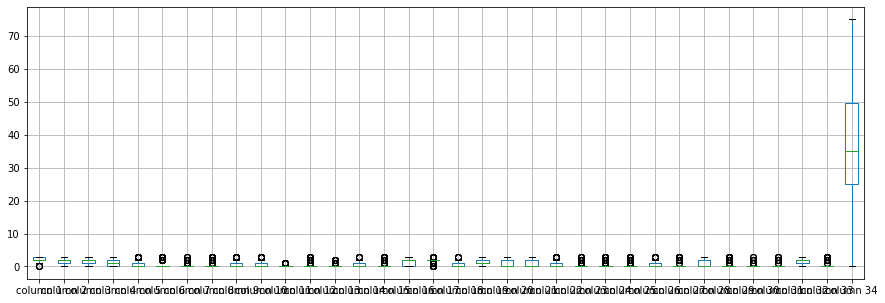

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.078212
column 2      1.807263
column 3      1.569832
column 4      1.354749
column 5      0.636872
column 6      0.485149
column 7      0.155882
column 8      0.389474
column 9      0.622905
column 10     0.530726
column 11     0.122905
column 12     0.417544
column 13     0.142458
column 14     0.547486
column 15     0.315642
column 16     1.368715
column 17     1.955307
column 18     0.511173
column 19     1.287709
column 20     0.662011
column 21     0.983240
column 22     0.600660
column 23     0.298883
column 24     0.368715
column 25     0.408824
column 26     0.474860
column 27     0.459649
column 28     0.949721
column 29     0.459649
column 30     0.077640
column 31     0.089109
column 32     1.877095
column 33     0.551155
column 34    36.296089
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.428769,0.248062,-0.033157,-0.008496,0.050189,-0.120207,-0.028817,0.138519,0.180740,...,-0.010409,0.153229,0.002797,0.038837,-0.002670,0.025703,0.037876,0.093026,-0.023945,-0.005028
column 2,0.428769,1.000000,0.347106,-0.072191,-0.009033,-0.077744,-0.097326,-0.075738,0.294258,0.295932,...,-0.094910,0.205046,-0.106514,0.023095,-0.110509,-0.014097,-0.011489,-0.008453,-0.126964,0.016006
column 3,0.248062,0.347106,1.000000,-0.058534,0.239778,0.315734,-0.154403,0.268114,0.301187,0.261495,...,0.276587,0.350007,0.277558,-0.252643,0.244932,-0.046704,-0.128969,0.124812,0.271464,0.138493
column 4,-0.033157,-0.072191,-0.058534,1.000000,0.280039,0.397722,-0.144183,0.333721,-0.296824,-0.152562,...,0.363755,-0.190548,0.354911,0.003028,0.350836,-0.134829,-0.142659,0.051553,0.368674,0.048053
column 5,-0.008496,-0.009033,0.239778,0.280039,1.000000,0.363454,-0.163428,0.363066,-0.065438,0.013496,...,0.386227,0.002588,0.347675,0.006726,0.347699,-0.119582,-0.146208,0.110295,0.371072,0.081162
column 6,0.050189,-0.077744,0.315734,0.397722,0.363454,1.000000,-0.120506,0.859616,-0.278492,-0.271925,...,0.881650,-0.113046,0.899967,0.101078,0.885827,-0.064247,-0.098530,0.278165,0.893492,0.105357
column 7,-0.120207,-0.097326,-0.154403,-0.144183,-0.163428,-0.120506,1.000000,-0.116018,0.213562,-0.013129,...,-0.099826,-0.156309,-0.123754,-0.017764,-0.122333,0.715746,0.746599,-0.088357,-0.122457,-0.348634
column 8,-0.028817,-0.075738,0.268114,0.333721,0.363066,0.859616,-0.116018,1.000000,-0.268819,-0.264716,...,0.887634,-0.091429,0.887497,0.102366,0.868789,-0.046897,-0.080536,0.277048,0.881910,0.109640
column 9,0.138519,0.294258,0.301187,-0.296824,-0.065438,-0.278492,0.213562,-0.268819,1.000000,0.659286,...,-0.270640,0.480594,-0.263349,-0.417851,-0.260325,0.178630,0.251981,-0.079246,-0.254868,-0.078267
column 10,0.180740,0.295932,0.261495,-0.152562,0.013496,-0.271925,-0.013129,-0.264716,0.659286,1.000000,...,-0.266746,0.485260,-0.253506,-0.425421,-0.258746,-0.035343,0.018260,0.027887,-0.242511,0.036412


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+12,34+12+12,34+12+12+12,34+12+12+12+12,34+12+12+12+12+12,34+12+12+12+12+12+12,34+12+12+12+12+12+12+12,34+12+12+12+12+12+12,34+12+12+12+12+12,34+12+12+12+12,34+12+12+12,34+12+12,34+12,34], vae_layer = False, seed = 12)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 74.99000445279208
Epoch: 1 , loss: 75.07594472711736
Epoch: 2 , loss: 75.01772551103072
Epoch: 3 , loss: 74.89429820667614
Epoch: 4 , loss: 74.8329849243164
Epoch: 5 , loss: 74.4186014695601
Epoch: 6 , loss: 74.64826028997248
Epoch: 7 , loss: 73.88587223399769
Epoch: 8 , loss: 73.43489508195357
Epoch: 9 , loss: 71.26180735501376
Epoch: 10 , loss: 68.42324256896973
Epoch: 11 , loss: 67.40523702448064
Epoch: 12 , loss: 66.88239479064941
Epoch: 13 , loss: 66.27565730701794
Epoch: 14 , loss: 65.7231348211115
Epoch: 15 , loss: 65.50520654158159
Epoch: 16 , loss: 65.62387431751598
Epoch: 17 , loss: 65.26217859441584
Epoch: 18 , loss: 65.09588900479403
Epoch: 19 , loss: 64.75424749200994
Epoch: 20 , loss: 64.6823054226962
Epoch: 21 , loss: 64.5049096887762
Epoch: 22 , loss: 64.42879590121183
Epoch: 23 , loss: 64.37760353088379
Epoch: 24 , loss: 64.15615341880105
Epoch: 25 , loss: 63.47497298500755
Epoch: 26 ,

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.0
column 2      1.0
column 3      1.0
column 4      1.0
column 5      0.0
column 6      0.0
column 7      2.0
column 8      0.0
column 9      3.0
column 10     2.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     1.0
column 15     0.0
column 16     1.0
column 17     1.0
column 18     1.0
column 19     1.0
column 20     0.0
column 21     0.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     1.0
column 32     1.0
column 33     1.0
column 34    12.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0,0,0,0.000000,0.000000,0.000000,0,0,...,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0,0.000000,0
1,0,0,0,0,0,0.356494,0.000000,0.267559,0,0,...,0.316929,0,0.346269,0,0.334380,-1.999913,-2.003404,0,0.000000,0
2,0,0,0,0,0,0.000000,-2.984887,0.192490,0,0,...,0.000000,0,0.232880,0,0.226956,-2.999512,0.000000,0,0.293908,0
3,0,0,0,0,0,0.000000,0.000000,0.000000,0,0,...,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0,0.000000,0
4,0,0,0,0,0,0.256875,0.000000,0.185987,0,0,...,0.222380,0,0.235568,0,0.230437,-2.000445,-2.002944,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0,0,0,0,0,0.203099,0.000000,0.154353,0,0,...,0.179289,0,0.187252,0,0.183242,0.000063,-0.001998,0,0.000000,0
354,0,0,0,0,0,0.212422,0.000000,0.149901,0,0,...,0.000000,0,0.194228,0,0.190992,0.000000,-0.001122,0,0.239538,0
355,0,0,0,0,0,0.000000,0.000000,0.000000,0,0,...,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0,0.000000,0
356,0,0,0,0,0,0.285642,0.000000,0.212594,0,0,...,0.250792,0,0.267269,0,0.256219,-0.000845,-0.004765,0,0.000000,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(22.99167820427593, 758.0725558942231)

In [17]:
NRMS=numerator/denominator
NRMS


0.03032912618391115

In [18]:
new_df.iloc[66,:]

column 1      2.0
column 2      0.0
column 3      0.0
column 4      3.0
column 5      0.0
column 6      0.0
column 7      0.0
column 8      0.0
column 9      0.0
column 10     0.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     0.0
column 15     2.0
column 16     2.0
column 17     2.0
column 18     0.0
column 19     0.0
column 20     0.0
column 21     3.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     0.0
column 32     2.0
column 33     0.0
column 34    22.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1,0.000000,0.000000,0.000000,2,2,...,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0,2.000000,0
1,1,1,2,0,0,0.356494,3.000000,0.267559,3,0,...,0.316929,0,0.346269,0,0.334380,0.000087,-0.003404,2,0.000000,7
2,2,2,1,0,0,0.000000,0.015113,0.192490,2,0,...,0.000000,0,0.232880,2,0.226956,0.000488,3.000000,2,0.293908,7
3,2,2,2,1,0,0.000000,2.000000,0.000000,2,2,...,0.000000,0,0.000000,2,0.000000,2.000000,2.000000,2,0.000000,7
4,2,2,1,0,0,0.256875,2.000000,0.185987,2,0,...,0.222380,0,0.235568,3,0.230437,-0.000445,-0.002944,2,0.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1,0.203099,0.000000,0.154353,0,0,...,0.179289,0,0.187252,3,0.183242,0.000063,-0.001998,3,0.000000,70
354,2,3,2,0,0,0.212422,0.000000,0.149901,3,2,...,0.000000,0,0.194228,0,0.190992,0.000000,-0.001122,1,0.239538,70
355,2,2,2,1,0,0.000000,0.000000,0.000000,0,0,...,0.000000,0,0.000000,2,0.000000,0.000000,0.000000,2,0.000000,70
356,2,1,0,3,0,0.285642,0.000000,0.212594,0,0,...,0.250792,0,0.267269,0,0.256219,-0.000845,-0.004765,1,0.000000,70


In [20]:
imputations[-1].to_excel("DERM_AL_5(imp).xlsx", index=False, header=False)